# Project: Communicate Data Findings - Loan Data from Prosper
## by Ting Yang

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. We will be analyzing some selective variables which I think has affect on the APR rate.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset
df_loan = pd.read_csv('ProsperLoanData.csv')
df_loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
15578,08C63501620609152E28CEC,487124,2010-12-07 15:46:50.967000000,NaN,36,Chargedoff,2011-11-15 00:00:00,0.38443,0.3220,0.3120,...,-4.76,0.00,891.50,891.50,0.00,1.0,0,0,0.0,5
64736,91C535471556365064FEBB9,589648,2012-05-16 08:23:36.843000000,NaN,36,Current,NaN,0.21372,0.1768,0.1668,...,-196.09,0.00,0.00,0.00,0.00,1.0,0,0,0.0,33
76218,4EC134057158900188D01FE,237749,2007-11-26 13:54:39.483000000,A,36,Completed,2010-06-11 00:00:00,0.10102,0.0895,0.0795,...,-22.70,0.00,0.00,0.00,0.00,1.0,0,0,0.0,79
19810,1CA03562154195303F3034D,665449,2012-11-05 08:58:37.450000000,NaN,36,Completed,2013-12-04 00:00:00,0.25781,0.2199,0.2099,...,-80.55,0.00,0.00,0.00,0.00,1.0,0,0,0.0,144
33030,DF53357594384276943D492,742797,2013-04-02 09:40:22.093000000,NaN,36,Current,NaN,0.15324,0.1249,0.1149,...,-39.54,0.00,0.00,0.00,0.00,1.0,0,0,0.0,86
98513,669B33993831429205DCE5B,204188,2007-09-20 07:48:42.413000000,D,36,Chargedoff,2011-01-01 00:00:00,0.29776,0.2900,0.2800,...,-71.12,-63.41,292.32,0.00,36.55,1.0,0,0,0.0,44
53632,1C9D339183326055296311E,152700,2007-06-15 12:11:31.903000000,A,36,Chargedoff,2009-02-23 00:00:00,0.18264,0.1754,0.1704,...,-78.98,-35.27,9703.35,9703.35,0.00,1.0,0,0,0.0,138
29943,C4C33578118565546C1C94A,763696,2013-04-29 18:43:58.657000000,NaN,60,Current,NaN,0.19364,0.1699,0.1599,...,-198.00,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
59192,F35B34598223191498C6B88,420894,2009-08-17 19:44:23.313000000,NaN,36,Completed,2010-09-28 00:00:00,0.08969,0.0550,0.0450,...,-8.30,0.00,0.00,0.00,0.00,1.0,0,0,0.0,89
6345,67CD3603420079993E5F0E8,1193834,2014-02-14 09:05:03.390000000,NaN,60,Current,NaN,0.18068,0.1570,0.1470,...,0.00,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1


In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> At this stage, I am first interested in finding out what influences borrower's interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the <b> ProsperRating </b> could affect the APR rate as the higher the Prosper rate, the lower APR rate. Borrowers' income could also have the same effect on APR.

From the descriptive table above, we can see there are missing data in the <b>ProsperRating</b> and <b>BorrowerAPR </b>. We first do a bit data wranggling.

In [4]:
df_loan = df_loan[~df_loan.BorrowerAPR.isna()]

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113912 non-null  object 
 1   ListingNumber                        113912 non-null  int64  
 2   ListingCreationDate                  113912 non-null  object 
 3   CreditGrade                          28928 non-null   object 
 4   Term                                 113912 non-null  int64  
 5   LoanStatus                           113912 non-null  object 
 6   ClosedDate                           55064 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113912 non-null  float64
 9   LenderYield                          113912 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#Create a subset with variables that we think are relavant

cols = ['LoanOriginalAmount', 'ProsperScore', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'Occupation','DelinquenciesLast7Years','AvailableBankcardCredit', 'CreditScoreRangeUpper']
df2_loan = df_loan[cols]
df2_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanOriginalAmount       113912 non-null  int64  
 1   ProsperScore             84853 non-null   float64
 2   BorrowerAPR              113912 non-null  float64
 3   StatedMonthlyIncome      113912 non-null  float64
 4   Term                     113912 non-null  int64  
 5   ProsperRating (Alpha)    84853 non-null   object 
 6   EmploymentStatus         111682 non-null  object 
 7   Occupation               110349 non-null  object 
 8   DelinquenciesLast7Years  112947 non-null  float64
 9   AvailableBankcardCredit  106393 non-null  float64
 10  CreditScoreRangeUpper    113346 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 10.4+ MB


## Univariate Exploration

First, start with the main variable (borrower APR) that we are interested in.

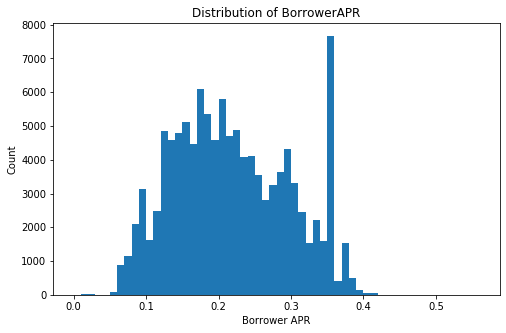

In [7]:
bins = np.arange(0, df2_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df2_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of BorrowerAPR');

The distribution of Borrower APR looks fairly normally distributed, however it is noticed that a very large peak appeared around 0.35.

Next look at <b> ProsperScore </b>.

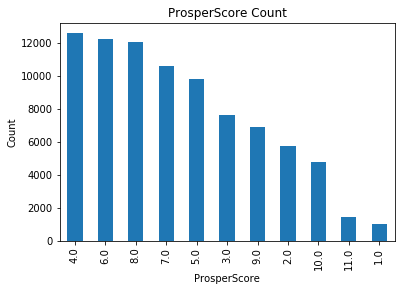

In [8]:
df2_loan['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.ylabel('Count')
plt.xlabel('ProsperScore')
plt.fontsize = 12

It looks like that most of the borrowers have scores of 4, 6, 8 and 7.

In [9]:
ProsperScore_Mean = df2_loan.ProsperScore.mean()
ProsperScore_Mean

5.950066585742402

Mow look at the variable of <b> stated monthly income</b>.

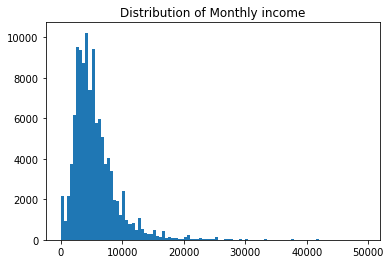

In [10]:
# Distribution of stated monthly income
bins = np.arange(0, 50000, 500)
plt.hist(data = df2_loan, x = 'StatedMonthlyIncome', bins=bins)
plt.title('Distribution of Monthly income');

The distribution of stated monthly income is very right skewed, with most of the monthly income is less than 20k.

Now we look at the relationships of <b> ProsperRating</b> and the <b>BorrowerAPR</b> mean.

In [11]:
ProsperRating_APRmean = df2_loan.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()
ProsperRating_APRmean

ProsperRating (Alpha)
A     0.138909
AA    0.090041
B     0.184030
C     0.226124
D     0.280581
E     0.330551
HR    0.356061
Name: BorrowerAPR, dtype: float64

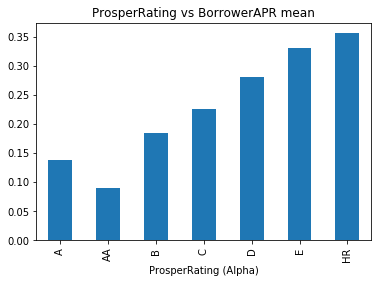

In [12]:
ProsperRating_APRmean.plot(kind='bar')
plt.title('ProsperRating vs BorrowerAPR mean');

Borrowers Rating ranges from highest rating to lowest rating (AA, A, B, C, D, E, HR). We can see that the highest rating of AA has the lowest APR mean, whereas the lowerest rating received the highest APR mean. This seems to be expected.

Now we look at the distributions of <b>Terms</b>, <b>EmploymentStatus</b>, <b>Occupation</b> and <b>ProsperRating</b>.

In [13]:
df2_loan['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [14]:
df2_loan['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

There are 67 occupations recorded, it will be too many to show on the chart. So we look at the distributions of <b>Terms</b>, <b>EmploymentStatus</b>,  and <b>ProsperRating</b>.

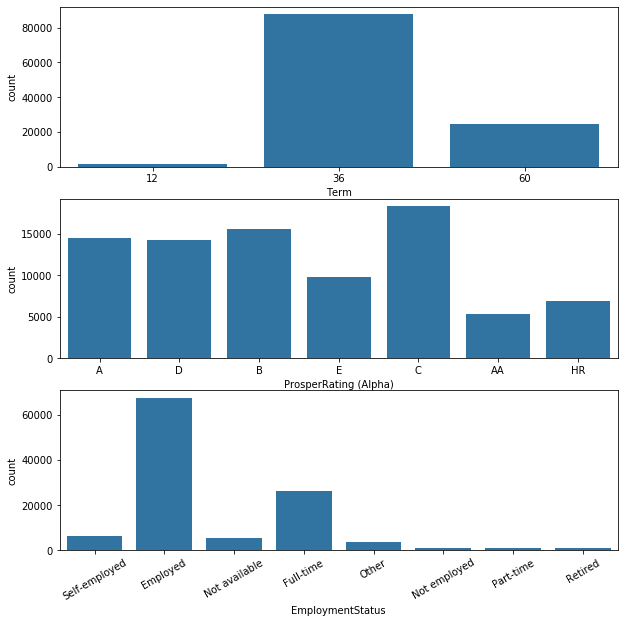

In [15]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df2_loan, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df2_loan, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = df2_loan, x = 'EmploymentStatus', color = default_color, ax = ax[2])
plt.xticks(rotation=30);

It looks like most of loans are 36 months long, and a small amount of loan are 60 months, Prosper is not very willing to lend money for short period.
The majority of the borrowers have ProsperRating od A, B, C and D, and their employment status are employed or full-time.



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have looked at a few variables that I think it will affect the Borrowers APR, and all came out to be what I expected. People who are employed or full-time employment are likely to be granted the loan, and people with a higher ProsperRating is likely to have a lower APR rate. There were not any unusal points, therefore I did not need to peform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of stated monthly income is highly right skewed. The mojaority of monthly income is less than 20k. People with income between 4k to 6K are more like to take a loan.

## Bivariate Exploration

> In this section, I will look at the paired relationships between the variables featured in the data.

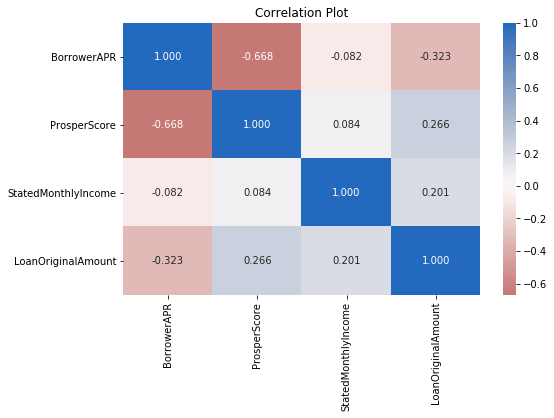

In [16]:
# correlation plot 

num_vars = ['BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome','LoanOriginalAmount']

plt.figure(figsize = [8, 5])
sb.heatmap(df2_loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

There are no strong correlation between any pairs of variables. However it is what we expected becasue higher monthly salary, the higher Prosper Score borrower will get. The negative correlation between ProsperScore and APR rate means the higher Score is, the lower APR rate borrower will receive.

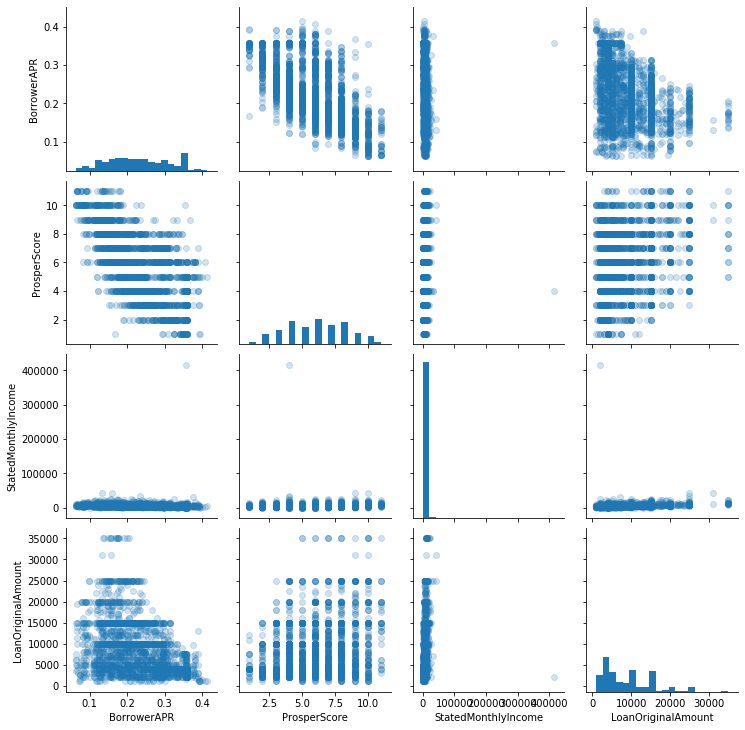

In [17]:
#plot matrix
loan_sample = df2_loan.sample(3000)
g = sb.PairGrid(data = loan_sample.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2)

The matrix plot gives us similar insights to the correlation plot above. The scatter plot shows negative correlation between APR rate and Prosper Score which agrees with the negative correlation coefficient. We can also tell that there is a postive correlation between the monthly income and loan amount, this is expected as people with higher salary is more likely to be granted a big amount loan.

/Users/tingyang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

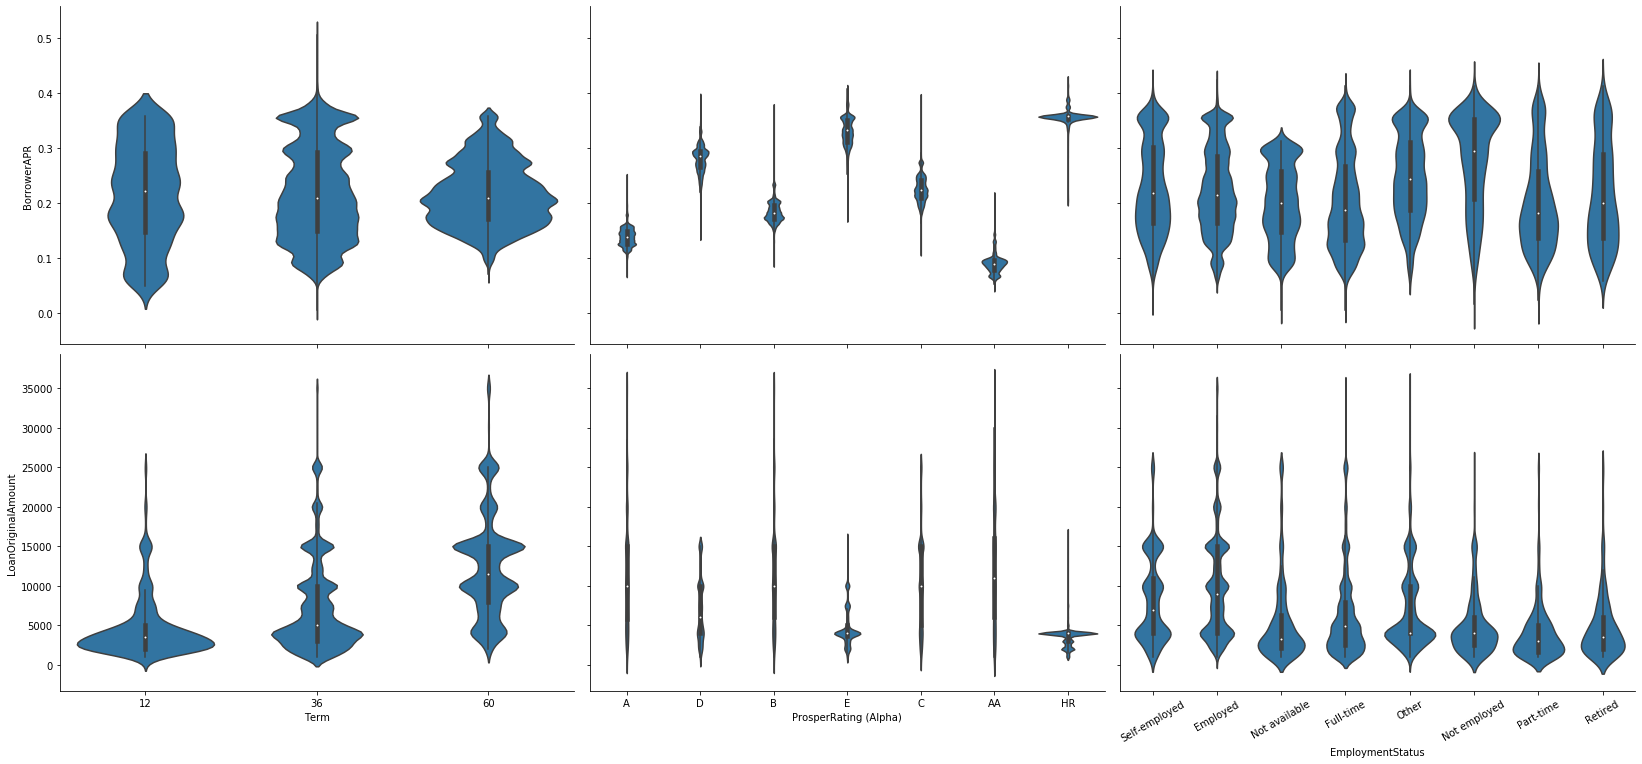

In [18]:
#creating box plots with seaborn's PairGrid
def violinplotgrid(x, y, **kwargs):
    sb.violinplot(x, y, color = sb.color_palette()[0])

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df2_loan, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], 
                x_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus'], size = 5, aspect = 1.5)
g.map(violinplotgrid);
plt.xticks(rotation=30);

The figures above show clearly that the loan amount is increased as the loan term increases. The borrower APR decreases as the ProsperRating decreases. Borrowers with the highest Prosper rating (AA) have the lowest APR. We can conclude that the Prosper rating has a strong effect on borrower APR, this also proved in the correlation plot with a negative correlation coeffcient of 0.668.  Employed, self-employed and full time borrowers are more likely to get a bigger loan compare to those who are part-time and other employment status.

Now we look at relationship between <b>BorrowerAPR</b> and <b>PropserScore</b>.

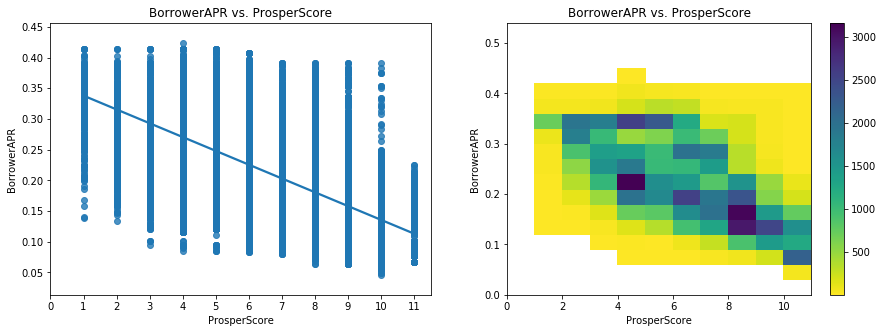

In [19]:
plt.figure(figsize = [15, 5]) 

#left plot: scatteplot of ProsperScore and BorrowerAPR
plt.subplot(1, 2, 1)
sb.regplot(data = df2_loan,  x = 'ProsperScore',y = 'BorrowerAPR')
plt.xticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.ylabel('BorrowerAPR')
plt.xlabel('ProsperScore')

#right plot: heat of ProsperScore and BorrowerAPR
plt.subplot(1, 2, 2)
bins_y = np.arange(0, df2_loan['BorrowerAPR'].max()+0.05, 0.03)
bins_x = np.arange(0, df2_loan['ProsperScore'].max()+1, 1)
plt.hist2d(data = df2_loan, x = 'ProsperScore',y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

Again, this is expected as higher ProsperScore leads to the lower APR rate, as those people tend to have a better credit rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR is negatively associated with the ProsperScore, and has a strong effect on the borrower APR, which mean the higher the score, the lower the APR. The borrower APR also negatively correlated with loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The amount of loan is postively correlated with loan term, but negatively correlated with Borrower APR.

## Multivariate Exploration

> In this section, I will look at if <b>ProsperRating</b> has an impact to the relationship between <b>BorrowerAPR</b> and <b>ProsperScore</b>.

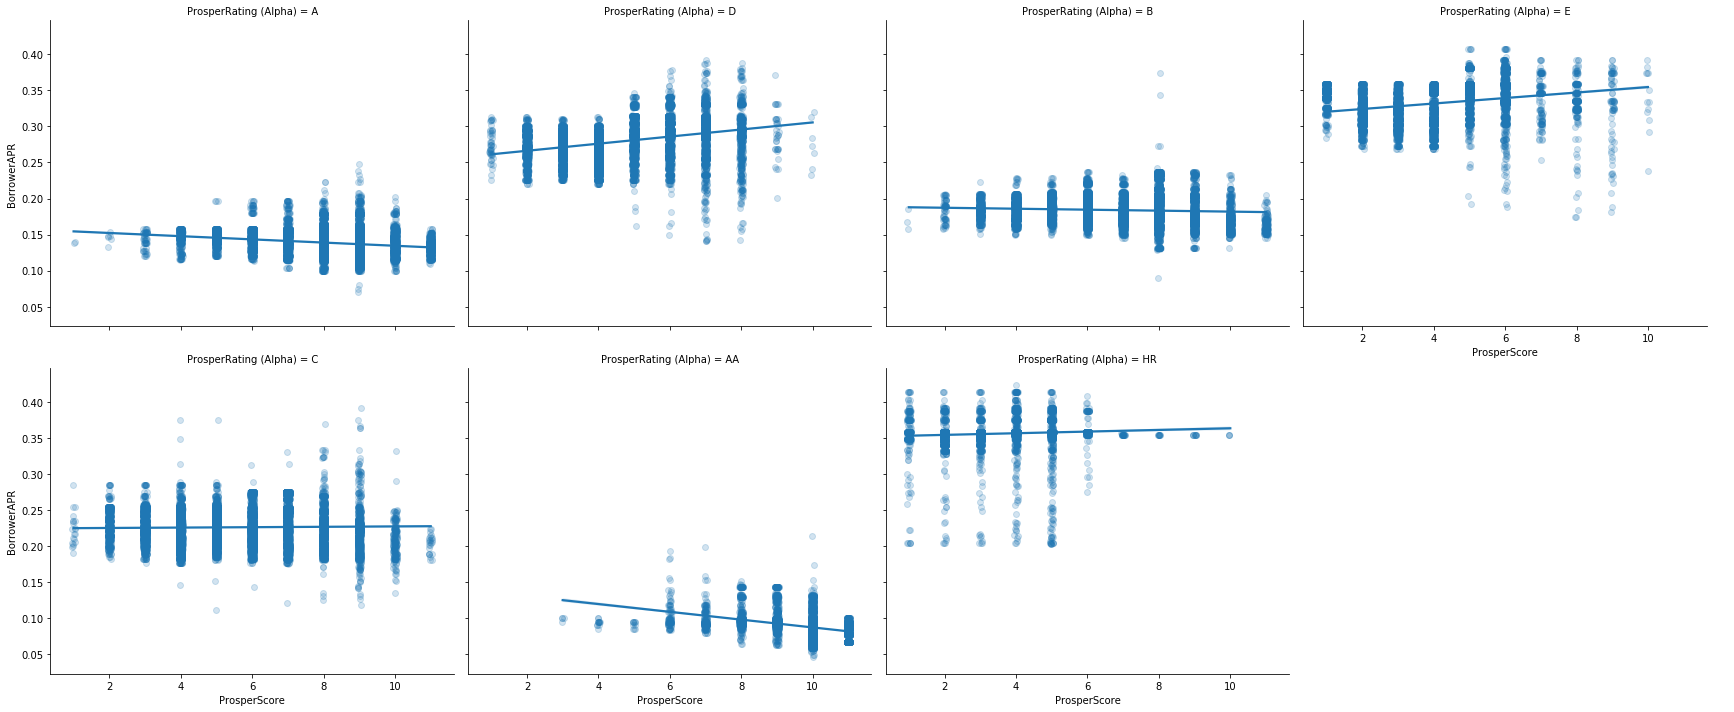

In [20]:
g=sb.FacetGrid(data=df2_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.2});
g.add_legend();

This visulization tells us the relationships between BorrowerAPR and ProsperScore on different ProsperRatings. It is interesting that some have negative impact and some have postive relationships, borrowers who have rating HR, E, D and C have postive relationship to the APR and ProsperScore, whereas borrowers with better ratings (B, A, AA) have a negative impact on the APR and ProsperScore. 

Now look at if loan term has any effect on <b>LoanOriginalAmount</b> and <b>ProsperRating</b>, as I am interested to see what determines the amount of money that people can borrow.

/Users/tingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


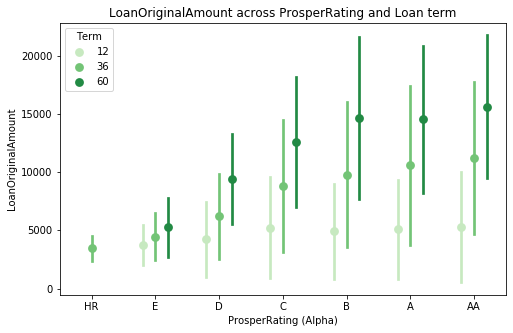

In [21]:
#first order prosper rating from HR to AA according to description
ProsperRate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ProsperRate_order)
df2_loan['ProsperRating (Alpha)'] = df2_loan['ProsperRating (Alpha)'].astype(ordered_var)

#point plot
fig = plt.figure(figsize=[8,5])
ax = sb.pointplot(data = df2_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('LoanOriginalAmount across ProsperRating and Loan term')
plt.ylabel('LoanOriginalAmount');


The pointplot shows that the loan amount increases with the better rating across all three different loan terms. This seems to be exprected as better rate leads to bigger loan.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration showed that the relationship between borrower APR and ProsperScore changes from positive to negative when the Prosper ratings increased from HR to AA. I also looked at if loan term effects on loan amount, it shows that with better Prosper rating, the loan amount increases acorss all three terms.

### Were there any interesting or surprising interactions between features?

> It is interesting to see that the interaction between borrowerAPR and ProsperScore changes when the Prosper rating is better.